In [ ]:
# generate a segmenattion model to generate masks over wells in input images

In [ ]:
# https://github.com/hiromis/notes/blob/master/Lesson3.md
# https://nbviewer.jupyter.org/github/fastai/course-v3/blob/master/nbs/dl1/lesson3-camvid.ipynb
# https://medium.com/@hiromi_suenaga/deep-learning-2-part-2-lesson-8-5ae195c49493

# https://forums.fast.ai/t/lesson-3-official-resources-and-updates/29732
# https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson3-camvid.ipynb
# https://github.com/fastai/fastai/blob/master/docs_src/data_block.ipynb    -> check here for all options

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import gc

In [ ]:
os.chdir("D:/data/DETECT_WELL/")
#os.getcwd()

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import torch
import fastai
import time

from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

import matplotlib.pyplot as plt

In [5]:
# set directory

path_lbl = "./Segment/masks/"  #path/'labels'
path_img = "./Segment/images/"  #path/'images'

In [ ]:
####################################   UNDERSTANDING DATA   ###########################################

In [6]:
## load & seeing sample images

fnames = get_image_files(path_img)
fnames[:2]

lbl_names = get_image_files(path_lbl)
lbl_names[:2]

[WindowsPath('Segment/images/image_0.jpg'),
 WindowsPath('Segment/images/image_1.jpg')]

[WindowsPath('Segment/masks/mask_image_0.png'),
 WindowsPath('Segment/masks/mask_image_1.png')]

In [7]:
# getting mask filename corrs. to an image file

# get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'
# https://forums.fast.ai/t/question-on-get-y-fn/48638
# https://docs.python.org/3/library/pathlib.html?highlight=stem#pathlib.PurePath.stem

def get_y_fn(img_f):
    #name = img_f.split("/")[-1].split(".jpg")[0]
    name = img_f.stem
    name = path_lbl+'mask_'+name+".png"  #path_lbl+name+".png"
    return name

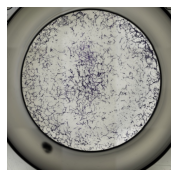

In [8]:
img_f = fnames[1]
img = open_image(img_f)
img.show(figsize=(3,3))

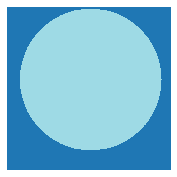

In [9]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(3,3), alpha=1)

In [10]:
mask.shape, mask.size

(torch.Size([1, 512, 512]), torch.Size([512, 512]))

In [11]:
mask.data[0][71]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
mask.data[0].shape

torch.Size([512, 512])

In [ ]:
'''import numpy as np
img_f = fnames[-1]
mask = open_mask(get_y_fn(img_f))
print(mask.data)
#np.savetxt('my_file.txt', mask)

In [ ]:
'''np.savetxt('my_file.txt', mask.data[0])

In [ ]:
'''(mask.data == 2).nonzero(as_tuple=False)

In [13]:
for i in range(len(fnames)):
    img_f = fnames[i]
    mask = open_mask(get_y_fn(img_f))
    #print(mask.data.flatten())
    print(mask.data.flatten().unique())

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])


In [ ]:
'''mask2 = open_mask(get_y_fn(img_f), div=True)
mask2.show(figsize=(3,3), alpha=1)

In [14]:
# define src_size for training
src_size = np.array(mask.shape[1:])
#src_size,mask.data

In [15]:
# creating the codes, since we don't have a codes.txt file
codes = np.array(['background','well'])
codes

array(['background', 'well'], dtype='<U10')

In [16]:
##  assigning the model parameters
size = src_size//2  # sets size to half of origibal size, to train faster
bs= 2   # 8

# set seeds
def random_seed(seed_value, use_cuda):  
    np.random.seed(seed_value) 
    torch.manual_seed(seed_value) 
    random.seed(seed_value) 
    torch.backends.cudnn.deterministic = True

    if use_cuda: torch.cuda.manual_seed_all(seed_value) 

# Set seed
random_seed(0,False)#'''
#random_seed(0,True)#'''

In [ ]:
'''
# SKIPPING, SINCE MASKS WERE GENERATED WITH 0 & 1

###############################################
# convert the masks to 0-1 scale

import PIL.Image as PilImage

def getClassValues(label_names):

    containedValues = set([])

    for i in range(len(label_names)):
        tmp = open_mask(label_names[i])
        tmp = tmp.data.numpy().flatten()
        tmp = set(tmp)
        containedValues = containedValues.union(tmp)
    
    return list(containedValues)

def replaceMaskValuesFromZeroToN(mask, 
                                 containedValues):

    numberOfClasses = len(containedValues)
    newMask = np.zeros(mask.shape)

    for i in range(numberOfClasses):
        newMask[mask == containedValues[i]] = i
    
    return newMask

def convertMaskToPilAndSave(mask, 
                            saveTo):

    imageSize = mask.squeeze().shape

    im = PilImage.new('L',(imageSize[1],imageSize[0]))
    im.putdata(mask.astype('uint8').ravel())
    im.save(saveTo)

def convertMasksToGrayscaleZeroToN(pathToLabels,
                                   saveToPath):

    label_names = get_image_files(pathToLabels)
    containedValues = getClassValues(label_names)

    for currentFile in label_names:
        currentMask = open_mask(currentFile).data.numpy()
        convertedMask = replaceMaskValuesFromZeroToN(currentMask, containedValues)
        #convertMaskToPilAndSave(convertedMask, saveToPath/f'{currentFile.name}')
        convertMaskToPilAndSave(convertedMask, saveToPath+str(currentFile.name))
    
    print('Conversion finished!')
    
pathToLabels = "./Segment/masks/"  #"./train_model_images/train/labels/"  #path_lbl = "./train_model_images/train/labels/" 
path_lbl = "./Segment/codelabels/" 
#convertMasksToGrayscaleZeroToN(pathToLabels, saveToPath)
convertMasksToGrayscaleZeroToN(pathToLabels, path_lbl)

In [17]:
# creating the data bunch for loading data

# https://github.com/hiromis/notes/blob/master/Lesson3.md
# https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson3-camvid.ipynb
# https://github.com/fastai/fastai/blob/master/docs_src/data_block.ipynb    -> check here for all options


src = (SegmentationItemList.from_folder(path_img)
       # Where to find the data? -> in path_img and its subfolders
       #.split_by_fname_file('../valid.txt')
       .split_by_rand_pct(valid_pct=0.2, seed=None)
        #How to split in train/valid? -> randomly with the default 20% in valid; since we don't have (& don't need) valid.txt
       .label_from_func(get_y_fn, classes=codes))

In [18]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        # size is half of input size, but are we converting it to fit some common input size for network?
        # since we are transforming image, we also need to transform the pixel annotations ie the Y
        .databunch(bs=bs)
        .normalize(imagenet_stats))

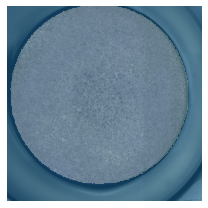

In [19]:
data.show_batch(1, figsize=(3,3))

In [ ]:
#######################   MODEL BUILDING   ################################

In [ ]:
# defining accuracy metric for segmentation
# no. of correctly classified pixels / #total number of pixels
# void pixels, if present, need to be removed - hence a separate accuracy metric has been defined
# NOT SURE IF ALL DATASETS HAVE VOID PIXELS (present on camvid data used in tutorial)

''' 
# we will use regular accuracy instead of acc_camvid - regular acc also gives error 
acc_camvid: this metric gave error with the road segmentation data.
# Also, try dice coefficient


name2id = {v:k for k,v in enumerate(codes)}
# void_code = name2id['Void']
if 'Void' in name2id.keys():
    void_code = name2id['Void']  # commenting out for our data
else:
    void_code = len(name2id.keys())+1

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code  # commenting out for our data, but that gives error
    #mask = target
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()
'''

In [20]:
def dice(input:Tensor, targs:Tensor, iou:bool=True)->Rank0Tensor:
    "Dice coefficient metric for binary target. If iou=True, returns iou metric, classic for segmentation problems."
    n = targs.shape[0]
    input = input.argmax(dim=1).view(n,-1)
    targs = targs.view(n,-1)
    intersect = (input*targs).sum().float()
    union = (input+targs).sum().float()
    if not iou: return 2. * intersect / union
    else: return intersect / (union-intersect+1.0)

metrics = dice
#metrics = [dice, accuracy]

In [21]:
learn = unet_learner(data, models.resnet34, metrics=metrics)

In [ ]:
'''lr_find(learn)
learn.recorder.plot()

In [22]:
print(lr)

NameError: name 'lr' is not defined

In [23]:
# run = 2, bs=4, metrics=dice
gc.collect()
learn.fit_one_cycle(5)

6453

epoch,train_loss,valid_loss,dice,time
0,0.868311,0.402543,0.664357,02:34
1,0.607015,0.340043,0.775012,03:02
2,0.484014,0.064600,0.961255,02:39
3,0.356549,0.064722,0.960416,02:37
4,0.274460,0.053773,0.967703,02:39


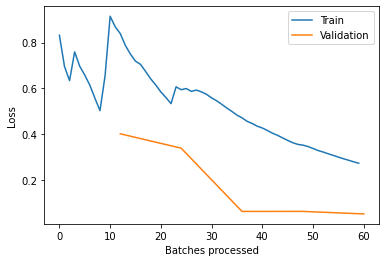

In [24]:
learn.recorder.plot_losses()

If your training loss is higher than your validation loss then you're underfitting. 
You want your training loss to be lower than your validation loss. 

If you're underfitting, you can: 
1. Train for longer. 
2. Train the last bit at a lower learning rate. 
3. But if you're still under fitting, then you're going to have to decrease regularization. 
  a. weight decay. 
  b. dropout. 
  c. data augmentation.

since the dataset in the current scenario is very small (total 30 images), offline augmentation is required,
apart from improving the augmentation at training time

In [23]:
'''
# run = 2, bs=4, metrics=dice, accuracy
gc.collect()
learn.fit_one_cycle(5)

6453

epoch,train_loss,valid_loss,dice,accuracy,time


RuntimeError: The size of tensor a (512) must match the size of tensor b (65536) at non-singleton dimension 1

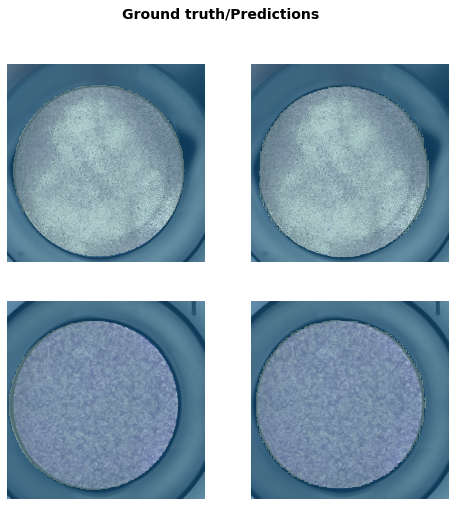

In [25]:
learn.show_results(rows=2, figsize=(8,8))

In [26]:
learn.save('stage-1')

In [27]:
learn.load('stage-1');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


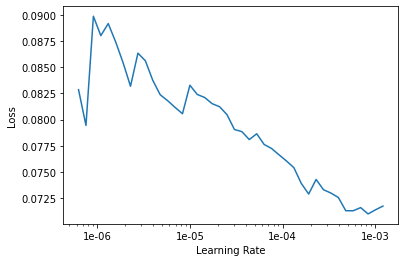

In [28]:
learn.unfreeze()

lr_find(learn)
learn.recorder.plot()

In [ ]:
We need to train earlier layers at lower learning rate (LR), & later layers (which were already trained) at higher LR. 
So specify a slice of values from before the rise

max_lr = slice(A,B)
A = should be well before it starts to get worse, on the graph (ususally 1/10 of where it is lowest b4 starts to rise)
B = 1/10 of previous lr

In [29]:
lr

NameError: name 'lr' is not defined

In [31]:
learn.fit_one_cycle(10, slice(1e-4, 1e-3))  # [A,B]

epoch,train_loss,valid_loss,dice,time
0,0.064664,0.049806,0.968134,03:14
1,0.084514,0.057866,0.965174,02:59
2,0.091255,0.073818,0.951816,02:46
3,0.085933,0.047703,0.969389,02:45
4,0.077553,0.039630,0.971387,02:51
5,0.073387,0.036435,0.974769,02:45
6,0.066238,0.037375,0.972521,02:55
7,0.068607,0.037757,0.971980,02:44
8,0.062530,0.036686,0.972836,02:44
9,0.058128,0.036776,0.972662,02:45


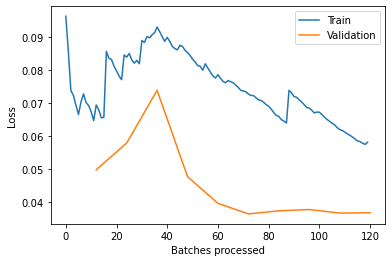

In [32]:
learn.recorder.plot_losses()

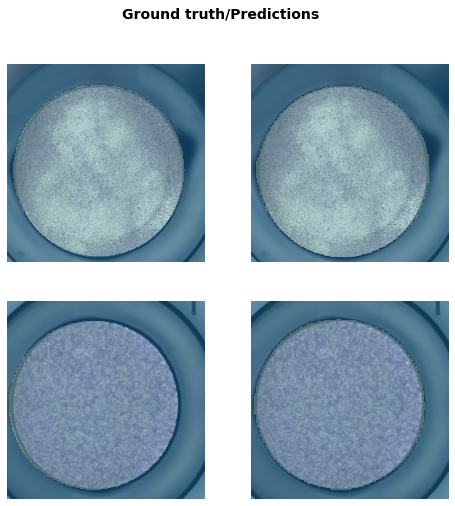

In [33]:
learn.show_results(rows=2)

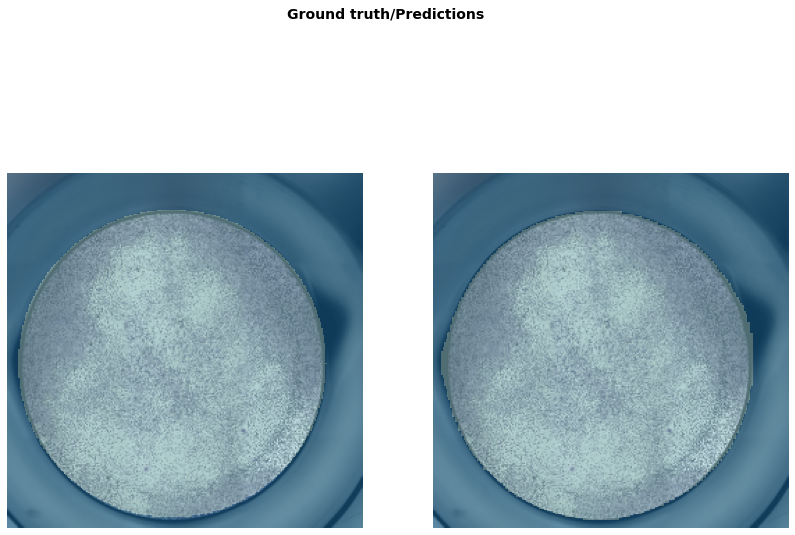

In [37]:
learn.show_results(rows=1, figsize=(14,10))

In [ ]:
In this case, we used the size (in our transforms) of the original image size/2.
But the problem is to segment all of the pixelsï¹£not half of the pixels.

So, put the size up to the full size of the source images. 
And halve my batch size to avoid running out of memory / GPU memory.

In [ ]:
# run the rest of the training with increased src & reduced batch size